**Linear Regression**

Data Generation

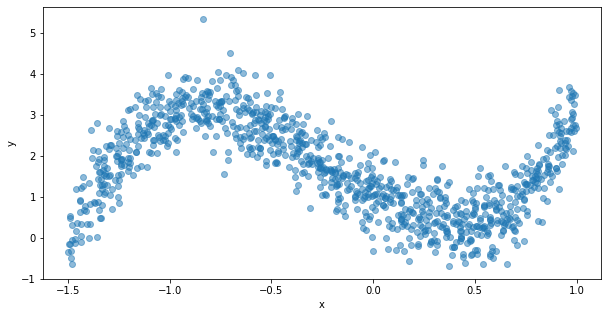

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

def f(x):
  epsilon = np.random.normal(0, 0.5)
  y = 3 * x ** 3 + 2 * x ** 2 - 3 * x + 1 + epsilon
  return y

x = np.sort(np.random.uniform(-1.5, 1.0, 1000)).reshape(-1, 1)
y = [f(p) for p in x]

plt.figure(figsize=(10, 5))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Data Preprocessing

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

x_hat = []

for K in range(4):
  poly = PolynomialFeatures(K+1)
  x_hat.append(poly.fit_transform(x))

Model Construction

In [ ]:
from sklearn.linear_model import LinearRegression

models = []
preds = []

for K in range(4):
  model = LinearRegression(fit_intercept=False)
  model.fit(x_hat[K], y)
  pred = model.predict(x_hat[K])
  models.append(model)
  preds.append(pred)

Results

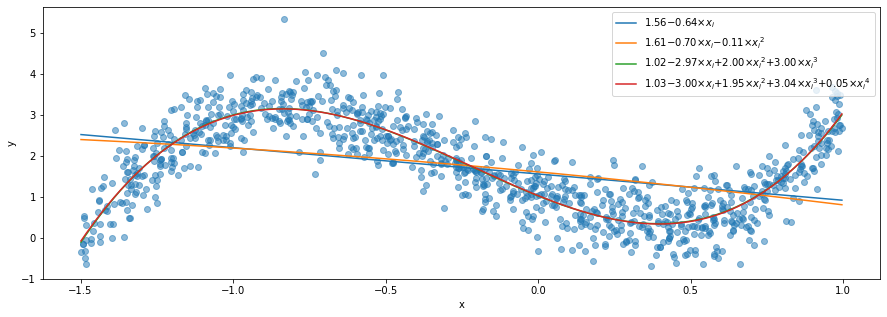

In [ ]:
plt.figure(figsize=(15, 5))
plt.scatter(x, y, alpha=0.5)

for K in range(4):
  label = r''
  for degree, cofficient in enumerate(models[K].coef_.squeeze()):
    if cofficient == 0:
      continue
    
    positive = True if cofficient > 0 else False
    cofficient = '%.2f'%(abs(cofficient))
    
    if not positive:
      label += r'$\minus$'
    
    if label and positive:
      label += r'$\plus$'

    label += cofficient

    if degree >= 1:
      label += r'$ \times x_i$'

    if degree >= 2:
      label += r'$^{}$'.format(degree)
  
  plt.plot(x, preds[K], label=label)

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

**Logistic Regression**

Data Generation

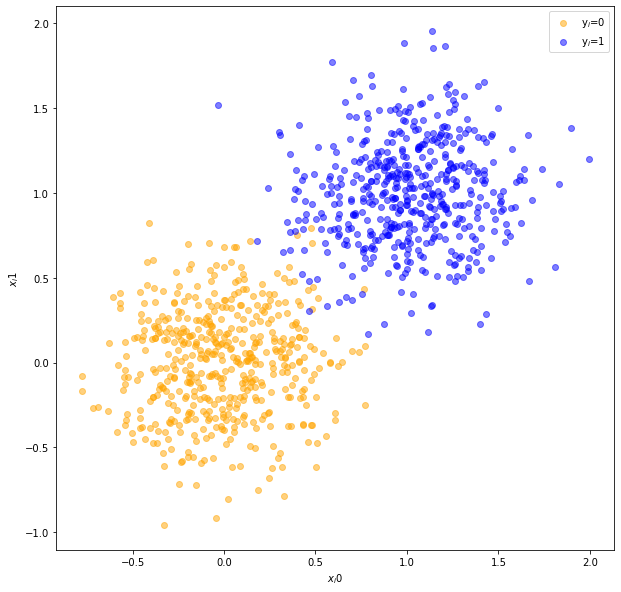

In [ ]:
import random

y = []
x = []

for i in range(1000):
  y_i = random.randint(0, 1)
  x_i = np.random.multivariate_normal([y_i, y_i], [[0.1, 0], [0, 0.1]])
  x.append(x_i)
  y.append(y_i)

x = np.array(x)
y = np.array(y)

plt.figure(figsize=(10, 10))

plt.scatter(x[np.where(y==0),0], x[np.where(y==0),1], c='orange', alpha=0.5, label = r'y$_i$=0')
plt.scatter(x[np.where(y==1),0], x[np.where(y==1),1], c='blue', alpha=0.5, label = r'y$_i$=1')

plt.xlabel(r'$x_i0$')
plt.ylabel(r'$x_i1$')
plt.legend()
plt.show()


Model Construction

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l2')
model.fit(x, y)

Results

Accuracy: 0.99


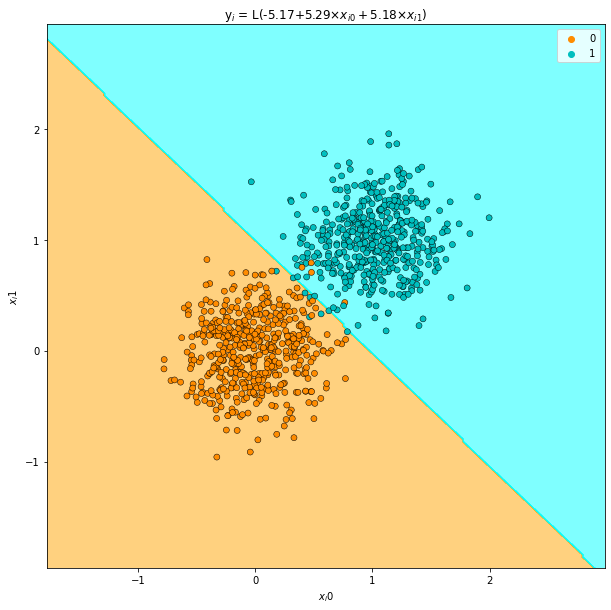

In [ ]:
from sklearn.metrics import accuracy_score
import seaborn as sns
from matplotlib.colors import ListedColormap

preds = model.predict(x)
print('Accuracy: {:.2f}'.format(accuracy_score(y, preds)))

bias = '%.2f'%(model.intercept_[0])
w0 = '%.2f'%(model.coef_[0][0])
w1 = '%.2f'%(model.coef_[0][1])
formula = r'y$_i$ = L(' + bias + '+' + w0 + r'$\times x_{i0} + $' + w1 + r'$\times x_{i1})$'

h = 0.02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["orange", "cyan"])
cmap_bold = ["darkorange", "c"]

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
z = z.reshape(xx.shape)
plt.figure(figsize = (10,10))
plt.contourf(xx, yy, z, cmap=cmap_light, alpha=0.5)

# Plot also the training points
sns.scatterplot(
    x=x[:, 0],
    y=x[:, 1],
    hue=y,
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel(r'$x_i0$')
plt.ylabel(r'$x_i1$')
plt.title(formula)
plt.legend()
plt.show()